Complete the exercises below For **Assignment #2**.

First, load the `Tidyverse` package which imports data visualization and wrangling libraries that we need.

In [7]:
# uncomment the code below and execute this cell
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


If you are unable to load the `Tidyverse` package, you may not have it installed. Please refer to the assignment `README` for instructions to update your `data730` environment to include the `Tidyverse` package.

## Data visualization

Let's work with the [Palmer Penguins data](https://allisonhorst.github.io/palmerpenguins/).

In [8]:
# uncomment the code below and execute this cell
library('palmerpenguins')
glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


We now have a data frame called `penguins` available. Use this table for the following exercises.

### Bar chart

In the cell below make a bar chart that shows how many penguins are in the data from each island. Encode the penguin species as the `fill` attribute of the bars.

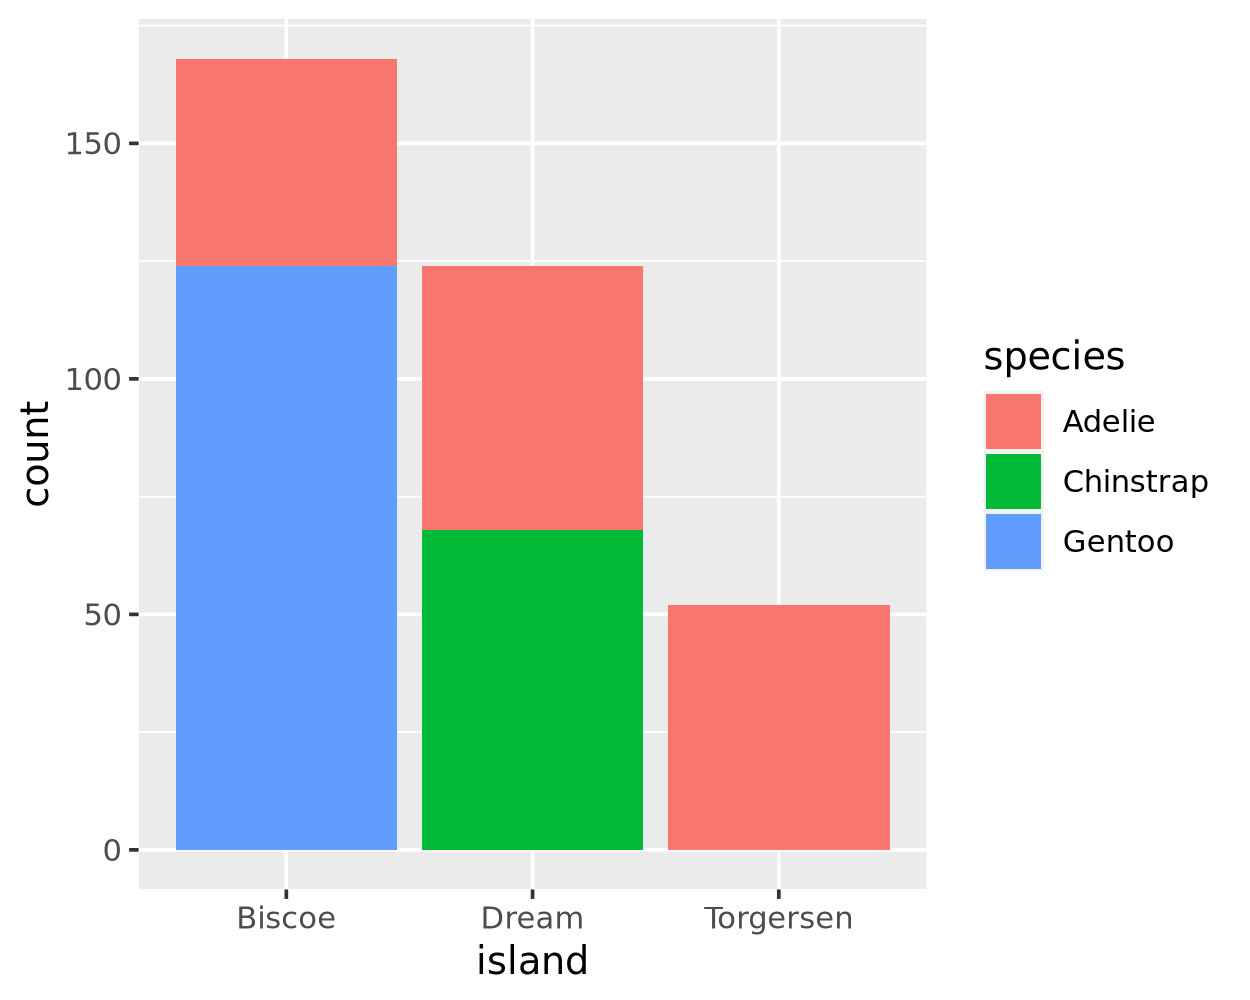

In [9]:
ggplot(penguins, aes(x = island, fill = species)) + geom_bar()

**In which islands were *Adelie* penguins observed?** Answer using a [markdown list](https://www.markdownguide.org/basic-syntax/#lists-1) in the cell below. 

⚠️ Remember to switch the cell type to `Markdown`.

The Adelie species seem to be observed in Biscoe, Dream and Torgersen island

### Scatter chart

Make a scatter chart of bill depth versus bill length. Color the points by penguin species. Add a `scale` modification to your chart to adjust the color palette (e.g. add `scale_color_brewer(palette = "Set2")`).

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


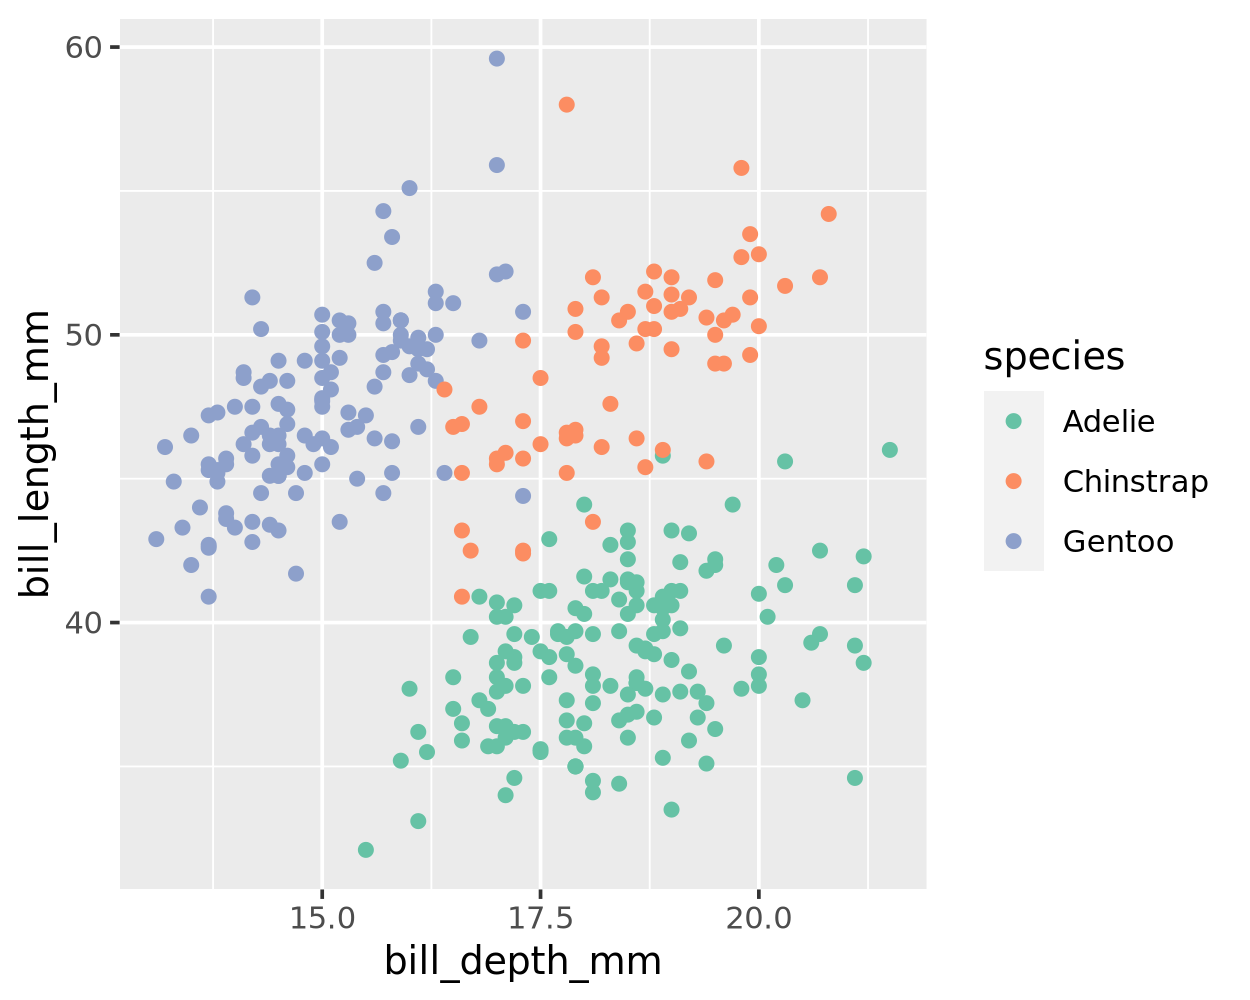

In [10]:
ggplot(penguins, aes(x = bill_depth_mm, y = bill_length_mm, color = species))+ 
scale_color_brewer(palette = "Set2") + geom_point()

### Histogram

Make a histogram of penguin body mass. 
- Facet your chart by the `sex` column using the `facet_wrap` function and setting the `ncol` parameter to `1`.
- In your `geom_histogram` layer, set the `position` argument to `"identity"` and set `alpha`to a value between `0` and `1`.
- Adjust the `fill` scale palette similarly to how we adjusted the `color` scale palette above. I.e. change to the [ColorBrewer](https://colorbrewer2.org/) `"Set2"` palette.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite values (`stat_bin()`).”


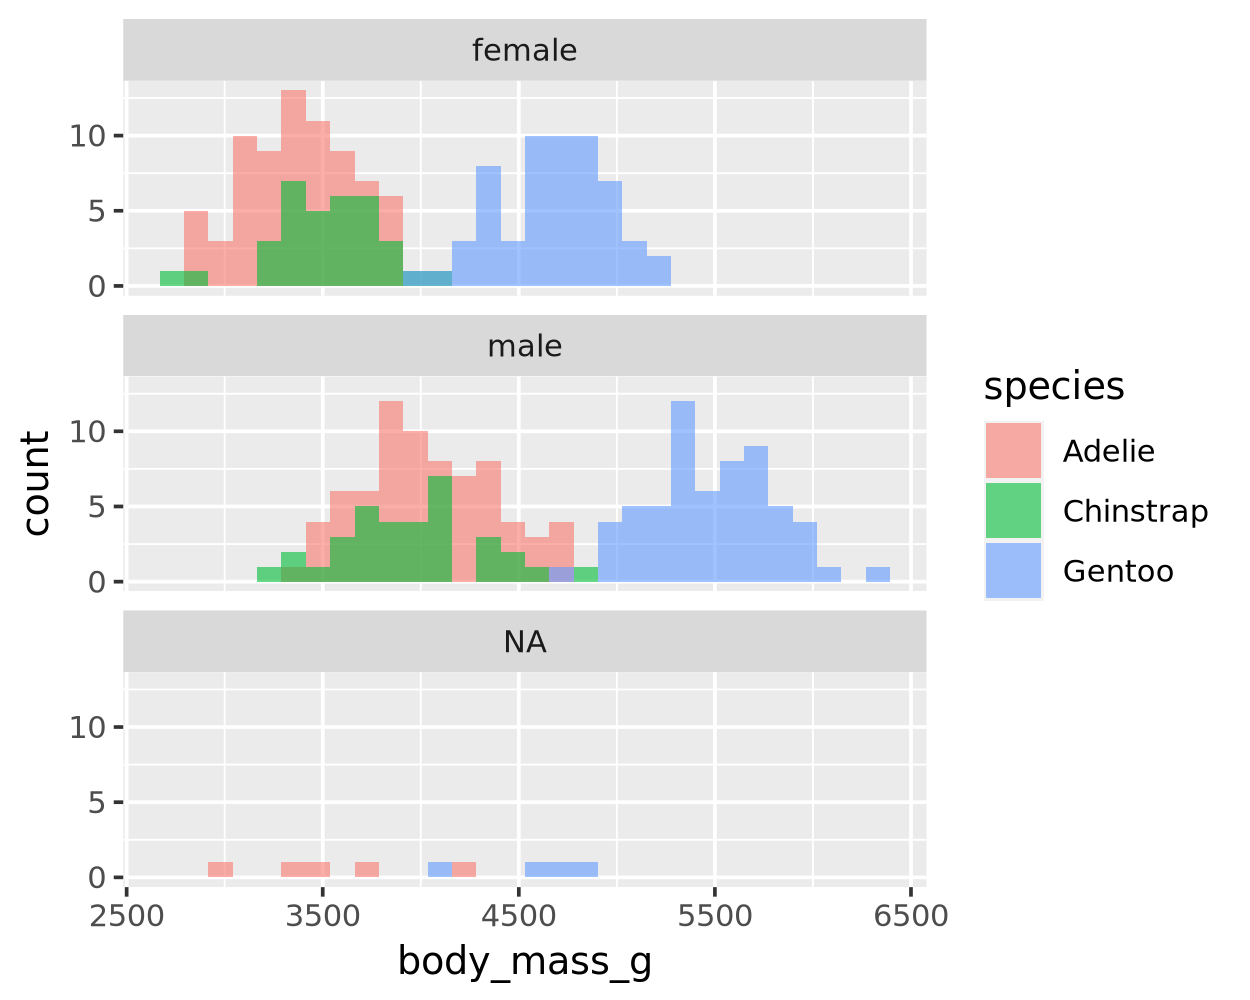

In [11]:
ggplot(penguins, aes(x = body_mass_g, fill = species))+
       geom_histogram(position ='identity', alpha = 0.6)+
       facet_wrap(~sex, ncol = 1)+
       scale_color_brewer(palette = "Set2")
       

What happens when you don't have `position = "identity"` in your `geom_histogram` layer? Answer below in a `Markdown` cell.

When I took out position = 'identity', I immediately noticed a higher count than when I had that statement in my code. The count with position as identity had a max of 10, although when I took it out I noticed a max of 20. This could be because the default position for a histogram would be stacked, therefore would not include any possible overlap of data and show each count values in a stacked orientation. Although, when including 'identity', it seems that we can an overlap in each species and not stacked values, which is why the count decreased with this statement in our code.

## Data wrangling

First we are going to bring in a data set to practice with called `txhousing`. You can find some information about `txhousing` [here](https://ggplot2.tidyverse.org/reference/txhousing.html).

In [12]:
# uncomment the next two lines and execute this cell
data(txhousing)
glimpse(txhousing)

Rows: 8,602
Columns: 9
$ city      <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abil…
$ year      <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, …
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ sales     <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, …
$ volume    <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 1263…
$ median    <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 6450…
$ listings  <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, …
$ inventory <dbl> 6.3, 6.6, 6.8, 6.9, 6.8, 6.6, 6.2, 6.4, 6.5, 6.6, 6.2, 5.7, …
$ date      <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, …


Write a code chunk to remove the inventory variable. Save the results in a data frame called `txhousing`. Use `glimpse` or `head` to confirm you have removed the variable.

In [13]:
txhousing$inventory <- NULL
glimpse(txhousing)

Rows: 8,602
Columns: 8
$ city     <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abile…
$ year     <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2…
$ month    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8…
$ sales    <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, 1…
$ volume   <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 12635…
$ median   <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 64500…
$ listings <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, 7…
$ date     <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, 2…


Make a data set called `dallas_sub` that includes data only from the city of Dallas in 2012 & 2013.

In [17]:
dallas_sub = txhousing |> filter(year==2012|year==2013,city=="Dallas")
glimpse(dallas_sub)

Rows: 24
Columns: 8
$ city     <chr> "Dallas", "Dallas", "Dallas", "Dallas", "Dallas", "Dallas", "…
$ year     <int> 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2…
$ month    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8…
$ sales    <dbl> 2555, 3085, 4068, 4291, 5004, 5196, 4859, 5264, 4151, 4214, 3…
$ volume   <dbl> 509458081, 634067291, 898320563, 983333297, 1175419749, 12090…
$ median   <dbl> 150800, 157100, 167300, 168700, 175100, 177900, 176000, 17420…
$ listings <dbl> 16721, 17173, 17433, 17632, 17726, 17587, 17314, 16611, 15994…
$ date     <dbl> 2012.000, 2012.083, 2012.167, 2012.250, 2012.333, 2012.417, 2…


Add a column to the `dallas_sub` data set called `prct_sold` that calculates the percentage of listings that were sold (`sales/listings * 100`). Be sure to save the results also as a data frame called `dallas_sub`.

In [19]:
dallas_sub = mutate(dallas_sub, prct_sold = (sales/listings * 100))
glimpse(dallas_sub)

Rows: 24
Columns: 9
$ city      <chr> "Dallas", "Dallas", "Dallas", "Dallas", "Dallas", "Dallas", …
$ year      <int> 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, …
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ sales     <dbl> 2555, 3085, 4068, 4291, 5004, 5196, 4859, 5264, 4151, 4214, …
$ volume    <dbl> 509458081, 634067291, 898320563, 983333297, 1175419749, 1209…
$ median    <dbl> 150800, 157100, 167300, 168700, 175100, 177900, 176000, 1742…
$ listings  <dbl> 16721, 17173, 17433, 17632, 17726, 17587, 17314, 16611, 1599…
$ date      <dbl> 2012.000, 2012.083, 2012.167, 2012.250, 2012.333, 2012.417, …
$ prct_sold <dbl> 15.28019, 17.96425, 23.33505, 24.33643, 28.22972, 29.54455, …


Calculate the average percentage of listings that were sold in Dallas in each month of the year based on your `dallas_sub` data set. Save the results of the calculation in an data frame called `dallas_summary`.

In [22]:
dallas_summary = dallas_sub |> group_by(month) |> summarize(average_prct_sold = mean(prct_sold))

glimpse(dallas_summary)

Rows: 12
Columns: 2
$ month             <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12
$ average_prct_sold <dbl> 20.54462, 23.47328, 32.24472, 34.46954, 38.20168, 37…


Use `slice_max` to see the top 3 months with the greatest average percentage of listings sold from `dallas_summary`. You do not need to save the results.

In [23]:
dallas_summary |> slice_max(order_by=average_prct_sold, n = 3)

month,average_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


Run the following code chunk. Study the code, and the output. Explain in your own words what this code chunk calculated.

In [24]:
 txhousing |>
  filter(year == 2012 | year == 2013, city == "Dallas") %>%
  mutate(prct_sold = sales/listings *100) |>
   group_by(month) |>
   summarize(mean_prct_sold = mean(prct_sold)) |>
   slice_max(mean_prct_sold, n = 3)

month,mean_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


This chunk of code first filters the dataset txhousing to values that only include data in the city of Dallas and in the years of 2012 and 2013. This code then adds a column using the mutate() function. The column we add is the % of listings sold. Next, we use the summarize() function to get the average of the % of listings sold per month. Lastly, we order by top 3 months with the highest average % of listings sold. This chunk of code didn't need any variables for storage as it was all within one chunk 